In [1]:
import pandas as pd

In [7]:
virus = "rsv-b"
dist=5
size=50

In [8]:
# load environments/virus/dist{dist}size{size}/lc_quality_df.parquet
lc_quality_df = pd.read_parquet(f"../../environments/{virus}/dist{dist}size{size}/lc_quality_df.parquet")

In [9]:
lc_quality_df

,B,B.3,B.D,B.D.1,B.D.1.1,B.D.1.NmC1,B.D.2,B.D.3,B.D.4,B.D.4.1,...,B.D.E.1.7,B.D.E.1.8,B.D.E.2,B.D.E.3,B.D.E.3.NmC1,B.D.E.4,B.D.E.5,B.D.E.6,B.D.E.7,B.D.NmC1
num,21,60,150,334,115,605,1269,433,1413,218,...,29,76,853,125,1318,1372,276,17,23,1726


In [10]:
# plot a bar plot 
# where y-axis is the lineage name (lc_quality_df columns)
# x-axis is the number of sequences in that lineage (lc_quality_df[num][lineage_name])
# sort by the number of sequences descending
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_1417712/2445278040.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lc_quality_df.sum().values, y=lc_quality_df.columns, palette="viridis")


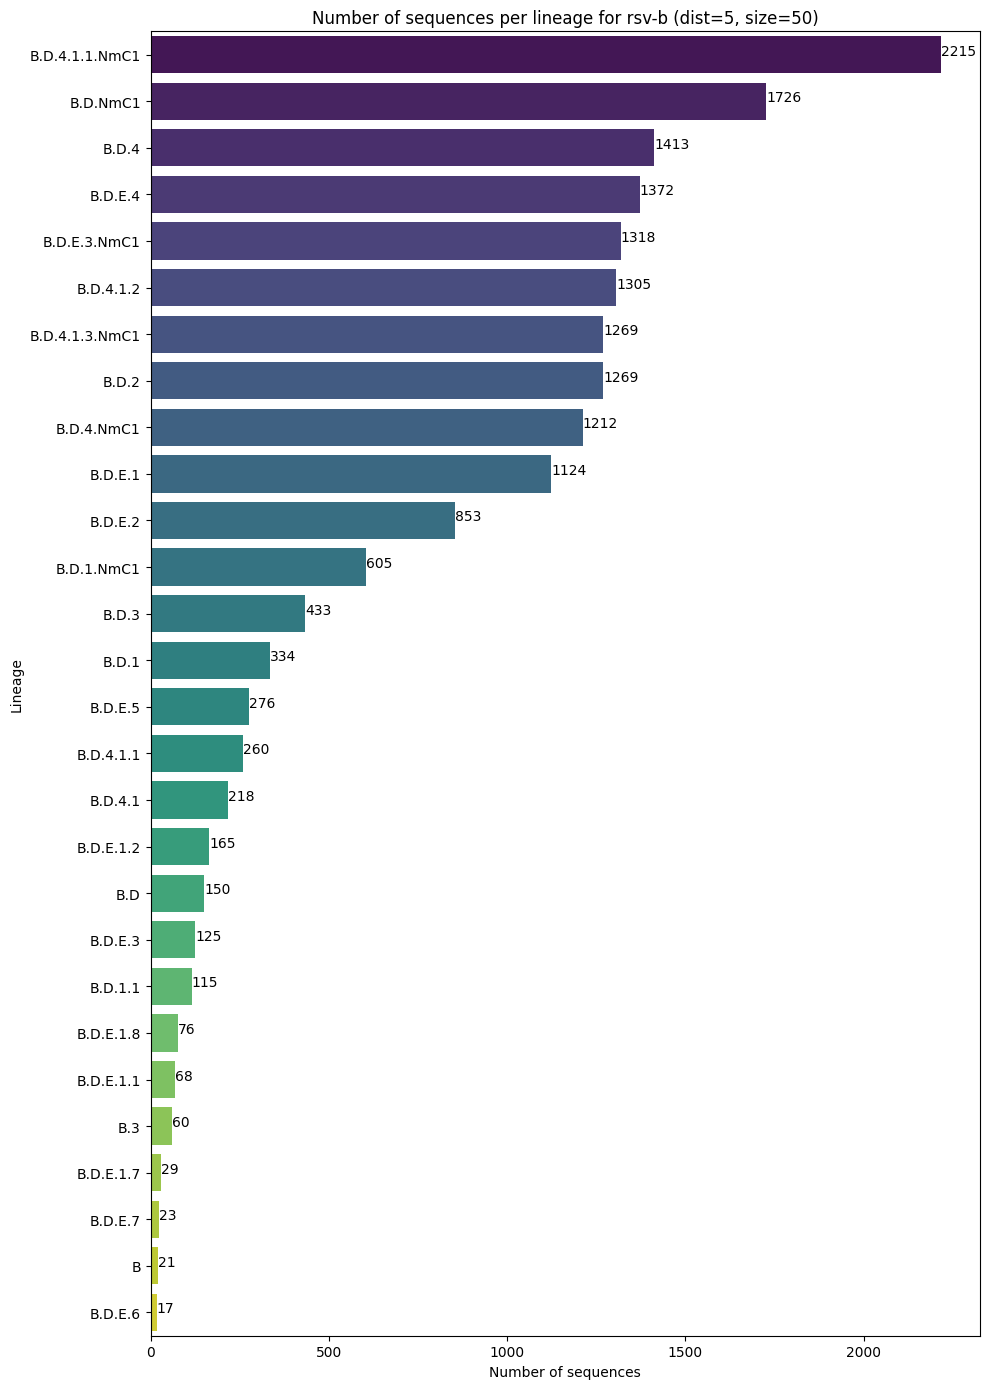

In [11]:
# plot
# add actual numbers on the bars
# x-axis is the number of sequences
# y-axis is the lineage name
# sort by the number of sequences descending
lc_quality_df = lc_quality_df[lc_quality_df.sum().sort_values(ascending=False).index]
plt.figure(figsize=(10,14))
sns.barplot(x=lc_quality_df.sum().values, y=lc_quality_df.columns, palette="viridis")
for index, value in enumerate(lc_quality_df.sum().values):
    plt.text(value, index, str(value))
plt.xlabel("Number of sequences")
plt.ylabel("Lineage")
plt.title(f"Number of sequences per lineage for {virus} (dist={dist}, size={size})")
plt.tight_layout()
plt.show()